# Analyse atom-level estimators
## Imports

In [1]:
import json
from constants import TASK_PATH, PLOT_PATH
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib
from utils import clean_string, reading_dict, get_cells, parse_dict, get_report, parse_tokenizer


colours = reversed(['#56B4E9', '#0072B2', '#E69F00', '#D55E00'])
matplotlib.rcParams['axes.prop_cycle'] = cycler('color', colours)

/home/jgut/miniconda3/envs/SMILES_OR_SELFIES/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/jgut/miniconda3/envs/SMILES_OR_SELFIES/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


## GAFF2 atom type classification
### Load data

In [2]:
entries = []
descriptors = {"annot_c":"Carbon", "annot_n":"Nitrogen","annot_o":"Oxygen","annot_all":"GAFF2 atom annotation",}
for descriptor_name in descriptors.keys():
    for encoding in ["SMILES", "SELFIES"]:
        for model in ["BART", "roberta"]:
            report_parent_path = TASK_PATH / descriptor_name / f"{encoding}_{model}" 
            if not report_parent_path.exists():
                continue
            for estimators_file in report_parent_path.glob("*.txt"):
                entry = {"descriptor": descriptor_name, "architecture": model, "encoding":encoding} | get_report(estimators_file) 
                entries.append(entry)
df = pd.DataFrame(entries)
df

,descriptor,architecture,encoding,estimator,best_params,best_scores,std
0,annot_c,BART,SMILES,RBF SVC,{'C': 10},0.849100,0.014881
1,annot_c,BART,SMILES,Linear SVC,{'C': 0.1},0.862875,0.004465
2,annot_c,BART,SMILES,KNN,"{'n_neighbors': 1, 'weights': 'uniform'}",0.854250,0.010760
3,annot_c,roberta,SMILES,RBF SVC,{'C': 10},0.901998,0.013134
4,annot_c,roberta,SMILES,Linear SVC,{'C': 0.1},0.924379,0.011798
5,annot_c,roberta,SMILES,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.912655,0.006859
6,annot_c,BART,SELFIES,RBF SVC,{'C': 10},0.663845,0.030841
7,annot_c,BART,SELFIES,Linear SVC,{'C': 0.1},0.708415,0.021534
8,annot_c,BART,SELFIES,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.647551,0.019792
9,annot_c,roberta,SELFIES,RBF SVC,{'C': 10},0.717754,0.013944


### Plot data

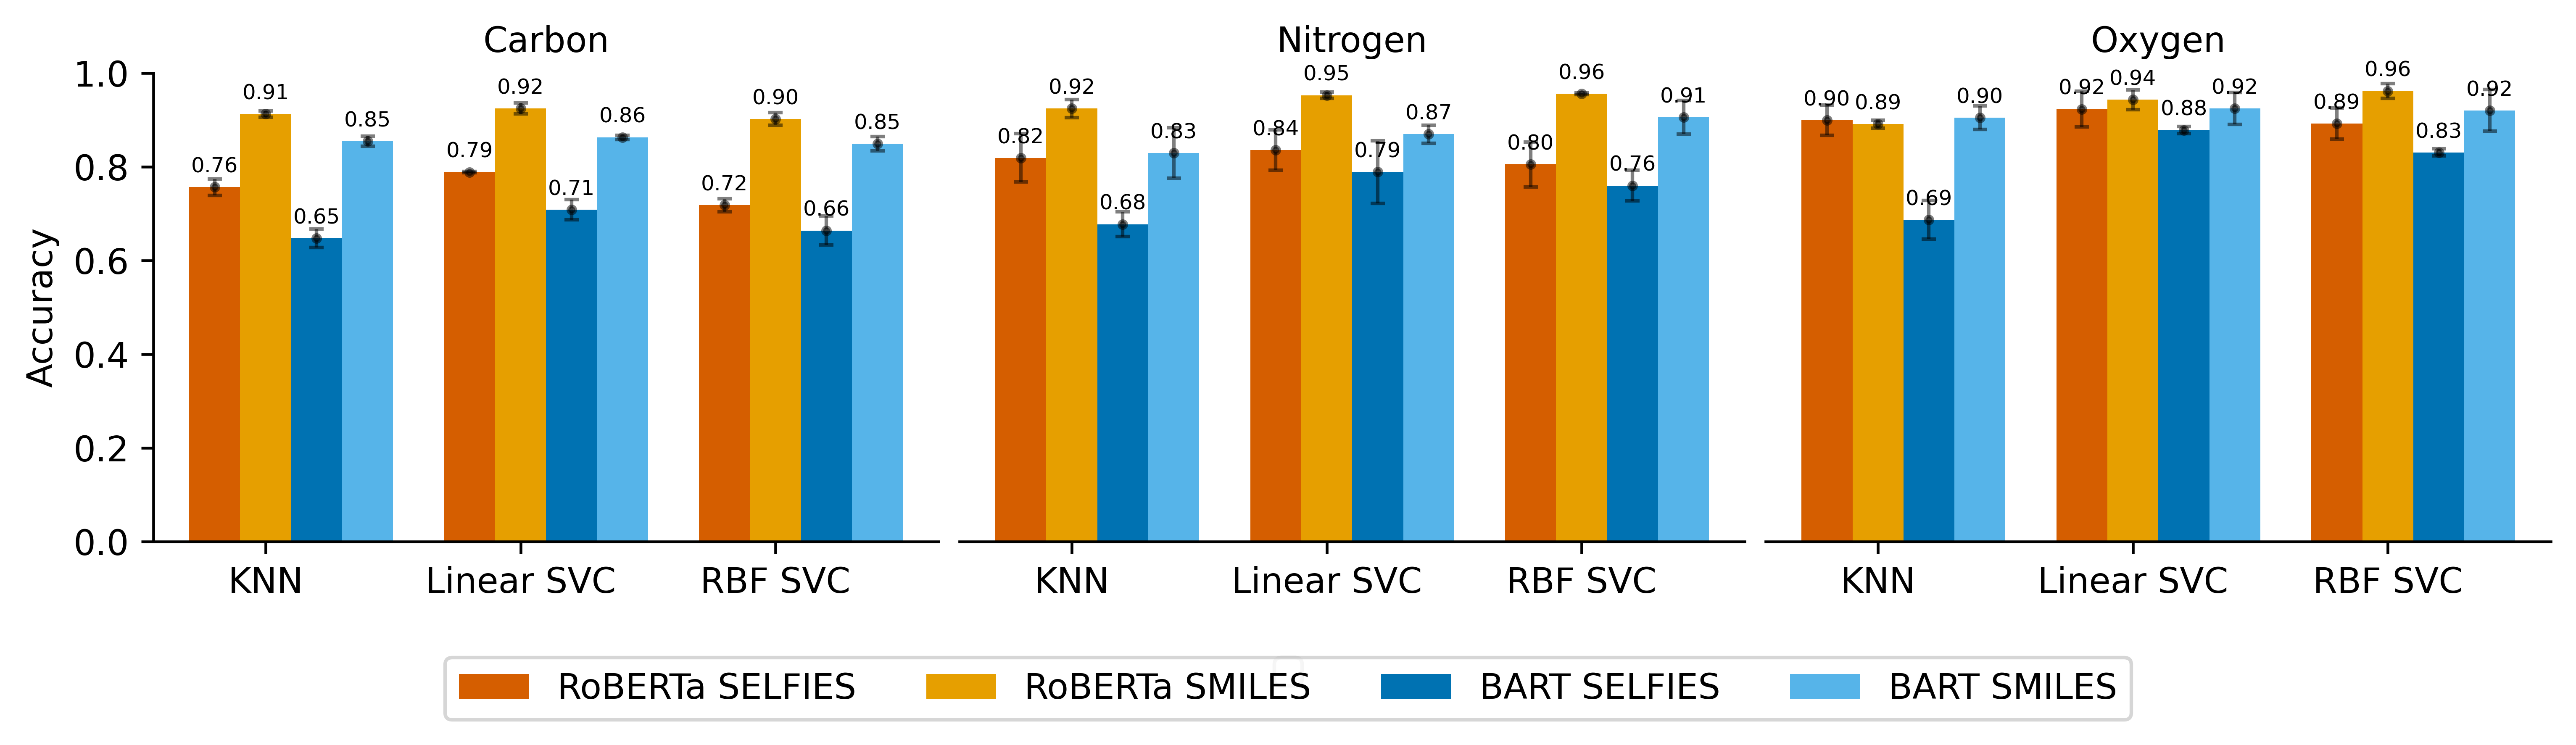

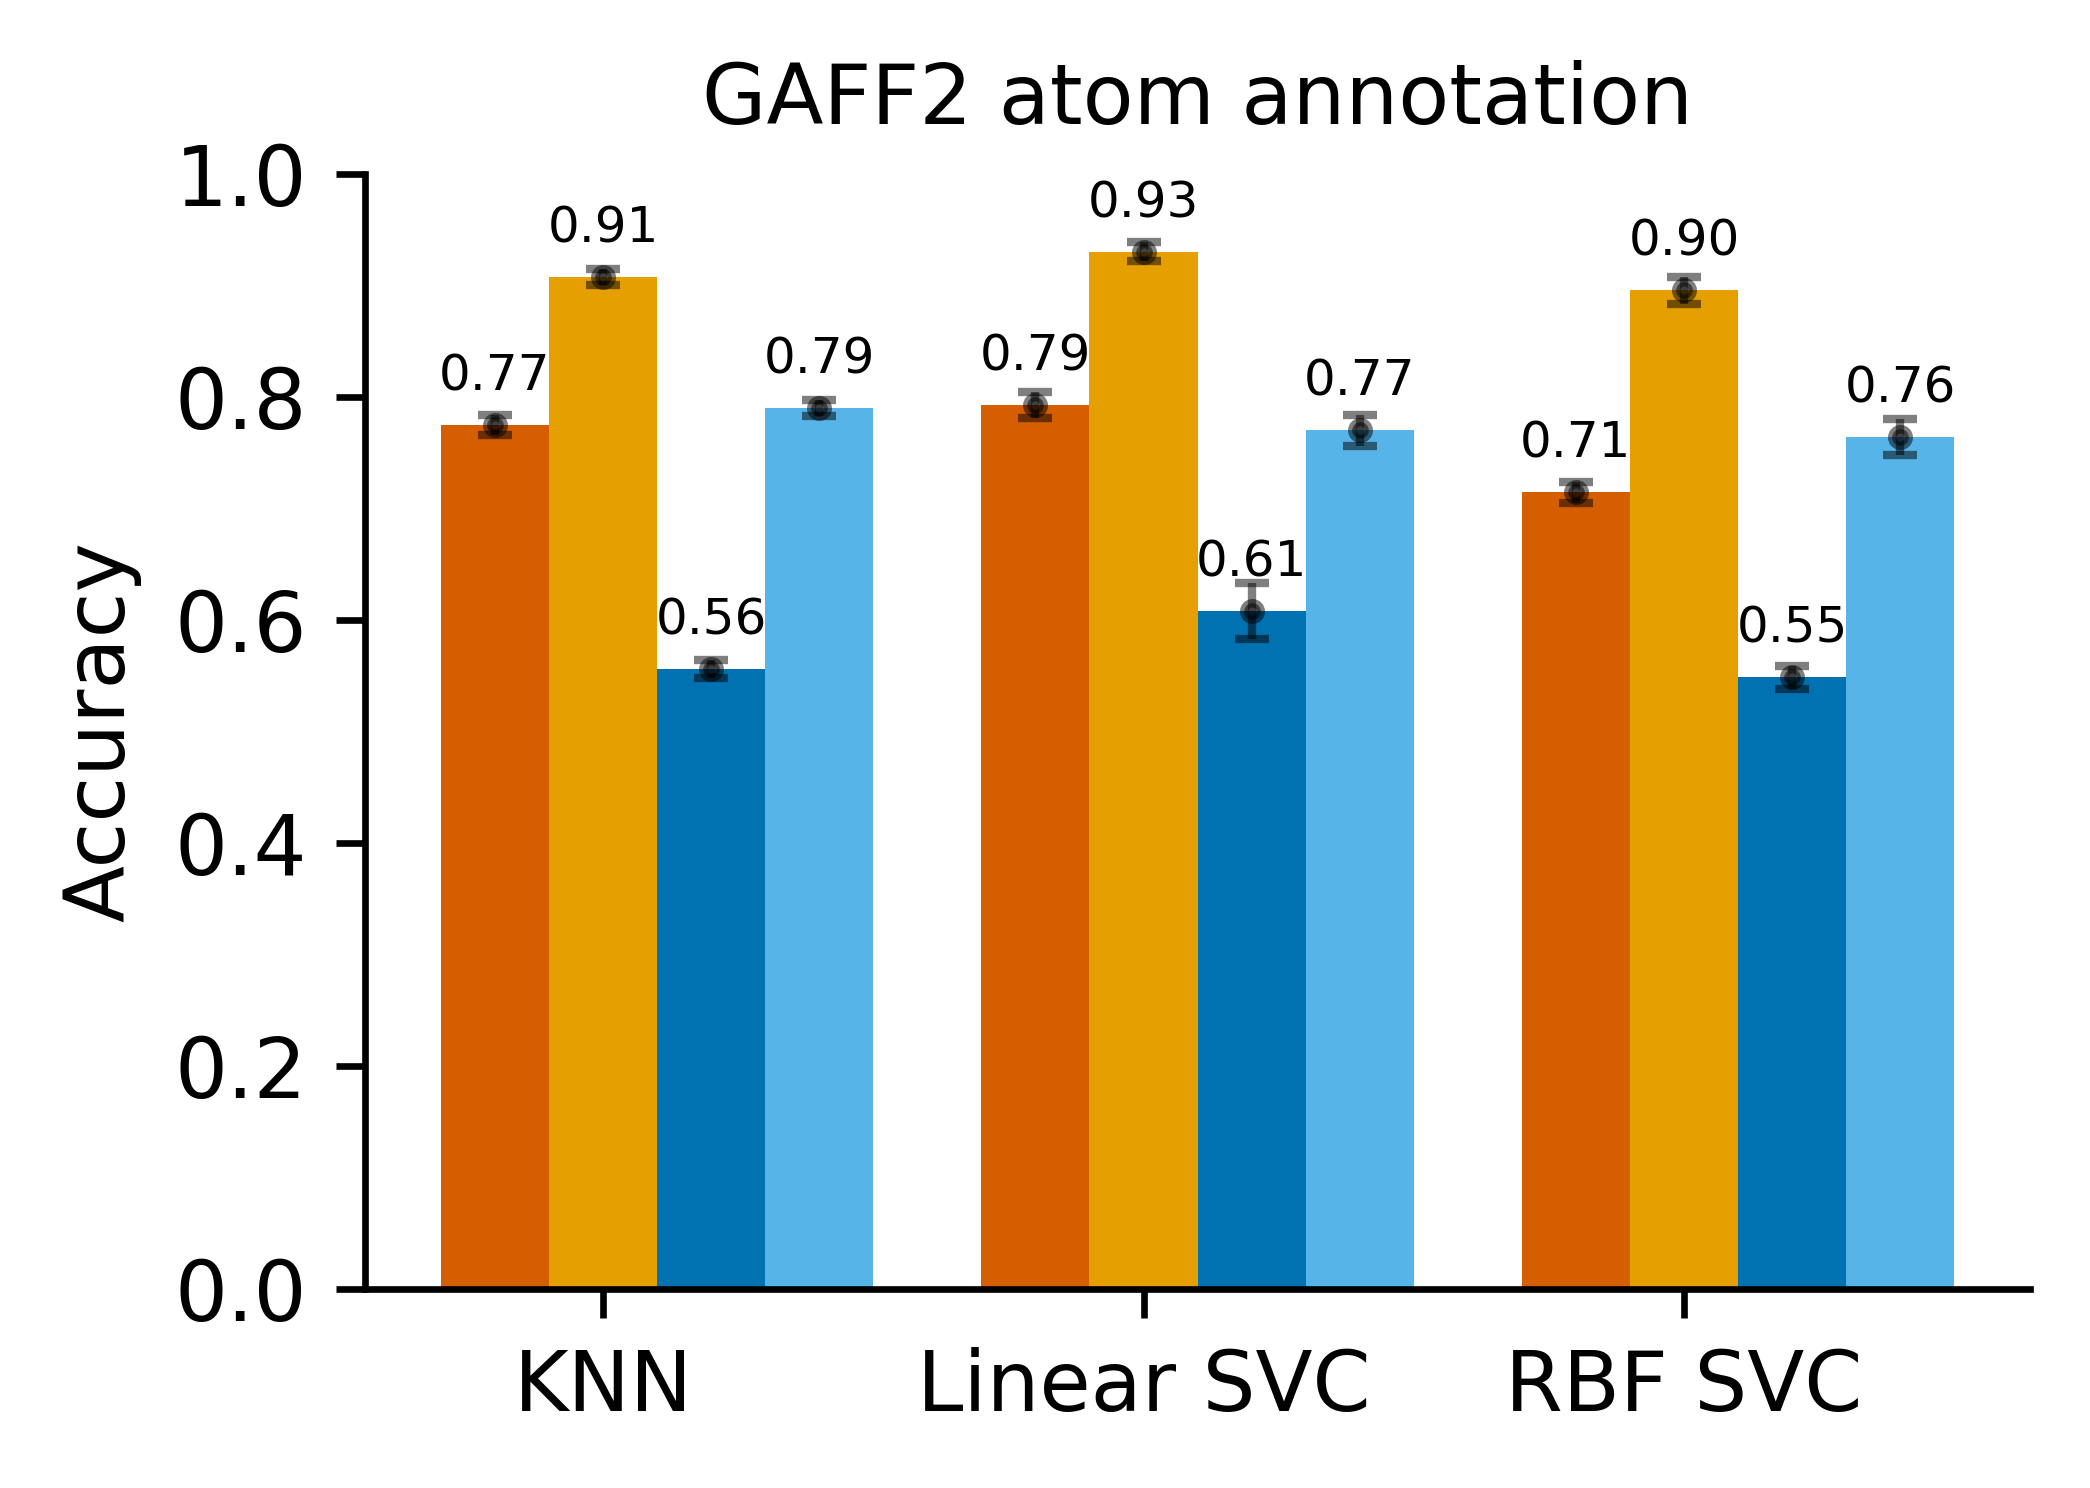

In [3]:
full_pivot = pd.pivot_table(df, values=["best_scores", "std"],index=["encoding","architecture"],columns=["descriptor","estimator"])
nice_rows = ["RoBERTa SELFIES", "RoBERTa SMILES", "BART SELFIES", "BART SMILES"]
classifiers = ['KNN', 'Linear SVC', 'RBF SVC']
data_dict = {}
std_dict = {}
for task in descriptors:
    data_dict[task] = {nice_rows[it]: vals for it, vals in enumerate(full_pivot["best_scores"][task].sort_values(by=["architecture",'encoding'], ascending=[False,True]).values)}
    std_dict[task] = {nice_rows[it]: vals for it, vals in enumerate(full_pivot["std"][task].sort_values(by=["architecture",'encoding'], ascending=[False,True]).values)}
x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars

plt.rcParams['font.size'] = 10
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(ncols=len(descriptors)-1, figsize=((17.1*cm/2)*(len(descriptors)-1), 6*cm), dpi=600, layout='constrained')

for it, task in enumerate(list(descriptors.keys())[:-1]):
    ax = axs[it]
    plt.rcParams['font.size'] = 6
    data = data_dict[task]
    std = std_dict[task]
    multiplier = 0
    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.errorbar(x + offset, measurement, std[attribute], fmt='.', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=0.5, ms=4, capsize = 2)
        ax.bar_label(rects, padding=3, fmt='%.2f')
        multiplier += 1
    ax.set_ylim(0,1)
    if it == 0:
        ax.set_ylabel('Accuracy')
        ax.spines[['right', 'top',]].set_visible(False)
    else:
        ax.spines[['right', 'top', "left"]].set_visible(False)
        ax.tick_params(left=[])
        ax.set_yticks([])
    ax.set_title(descriptors[task], fontsize=10)
    ax.set_xticks(x + width, classifiers)     
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4, fontsize=10)
plt.savefig(PLOT_PATH/f'weak_classifiers_annotation.pdf', bbox_inches='tight',dpi=600, transparent=True)
plt.savefig(PLOT_PATH/f'weak_classifiers_annotation.png', bbox_inches='tight',dpi=600, transparent=True)
plt.show()

for it, task in enumerate(list(descriptors.keys())[-1:]):
    plt.rcParams['font.size'] = 10
    fig, axs = plt.subplots(ncols=1, figsize=((17.1*cm/2), 6*cm), dpi=600, layout='constrained')
    ax = plt.gca()
    plt.rcParams['font.size'] = 6
    data = data_dict[task]
    std = std_dict[task]
    multiplier = 0
    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.errorbar(x + offset, measurement, std[attribute], fmt='.', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=0.5, ms=4, capsize = 2)
        ax.bar_label(rects, padding=3, fmt='%.2f')
        multiplier += 1
    ax.set_ylim(0,1)
    if it == 0:
        ax.set_ylabel('Accuracy')
        ax.spines[['right', 'top',]].set_visible(False)
    else:
        ax.spines[['right', 'top', "left"]].set_visible(False)
        ax.tick_params(left=[])
        ax.set_yticks([])
    ax.set_title(descriptors[task], fontsize=10)
    ax.set_xticks(x + width, classifiers)     
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
plt.savefig(PLOT_PATH/f'weak_classifiers_annotation_all.pdf', bbox_inches='tight',dpi=600, transparent=True)
plt.savefig(PLOT_PATH/f'weak_classifiers_annotation_all.png', bbox_inches='tight',dpi=600, transparent=True)
plt.show()

## ETH dataset
### Load data

In [4]:
entries = []
descriptors = {"mulliken":"Mulliken", "resp1":"Resp 1", "resp2":"Resp 2", "dual":"Dual descriptor", "mbis_dipole_strength":"MBIS Dipole Strength"}
for descriptor_name in descriptors.keys():
    for encoding in ["SMILES", "SELFIES"]:
        for model in ["BART", "roberta"]:
            report_parent_path = TASK_PATH / descriptor_name / f"{encoding}_{model}" 
            if not report_parent_path.exists():
                continue
            for estimators_file in report_parent_path.glob("*.txt"):
                entry = {"descriptor": descriptor_name, "architecture": model, "encoding":encoding} | get_report(estimators_file) 
                entries.append(entry)
df = pd.DataFrame(entries)
df

,descriptor,architecture,encoding,estimator,best_params,best_scores,std
0,mulliken,BART,SMILES,Linear SVR,{'C': 0.1},0.189693,0.014777
1,mulliken,BART,SMILES,RBF SVR,{'C': 1},0.159547,0.000342
2,mulliken,BART,SMILES,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.171133,0.001723
3,mulliken,roberta,SMILES,Linear SVR,{'C': 0.1},0.139032,0.002426
4,mulliken,roberta,SMILES,RBF SVR,{'C': 10},0.109943,0.001139
5,mulliken,roberta,SMILES,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.122582,0.001052
6,mulliken,BART,SELFIES,Linear SVR,{'C': 0.1},0.200348,0.002951
7,mulliken,BART,SELFIES,RBF SVR,{'C': 1},0.180995,0.000827
8,mulliken,BART,SELFIES,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.197221,0.001291
9,mulliken,roberta,SELFIES,Linear SVR,{'C': 0.1},0.168956,0.002249


### Plot data

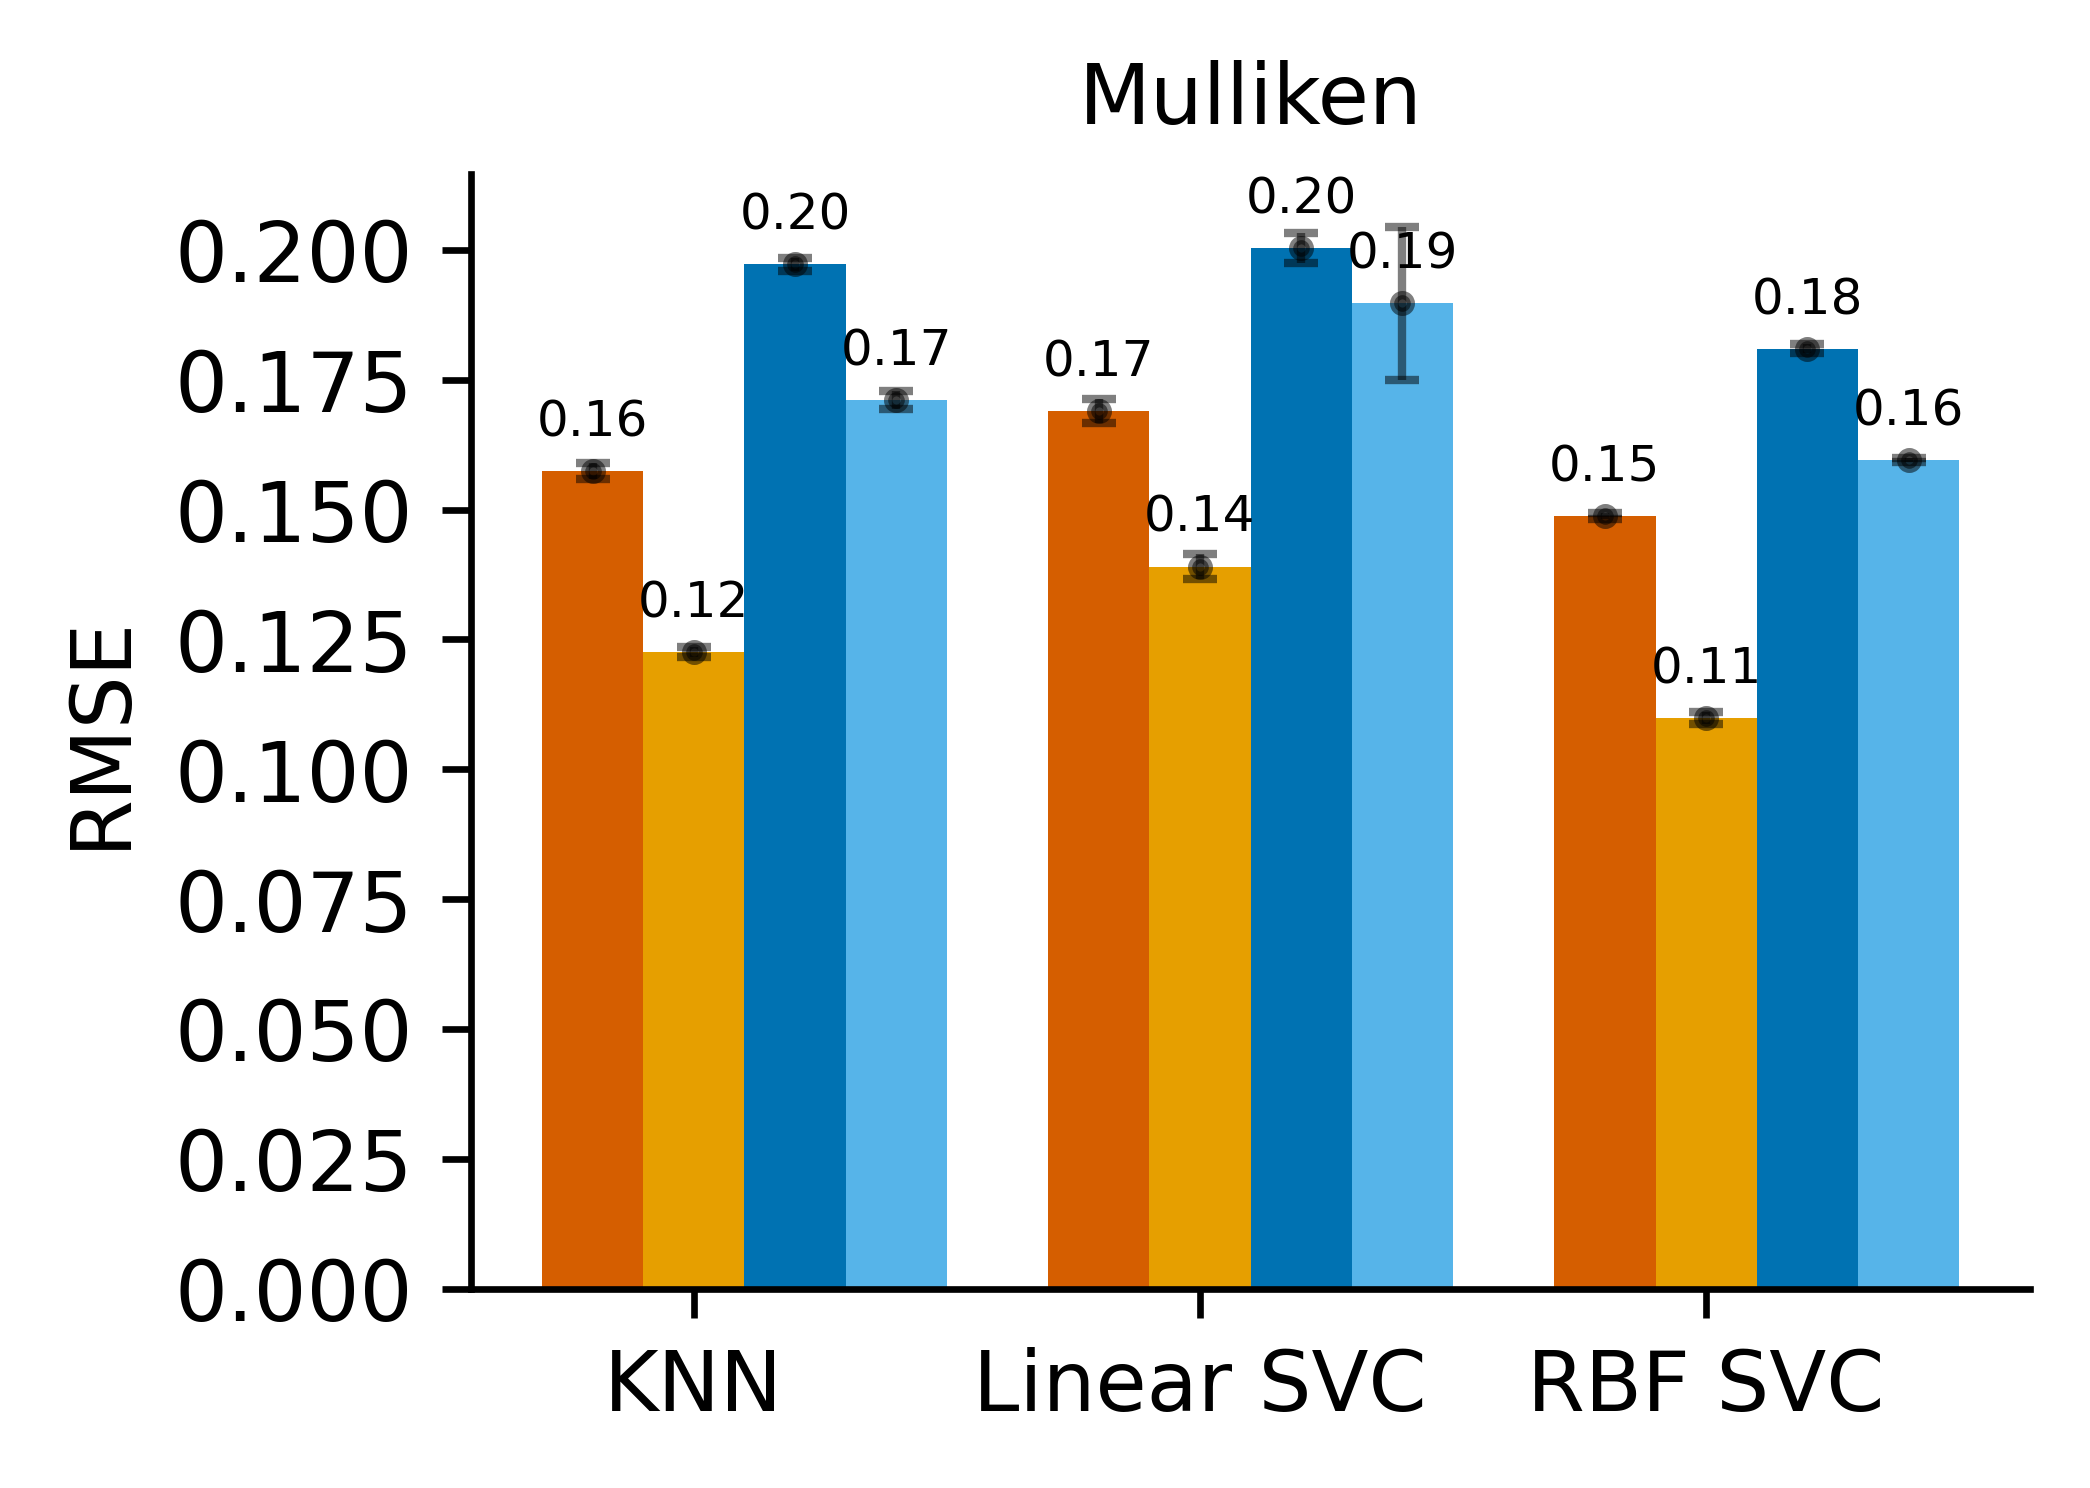

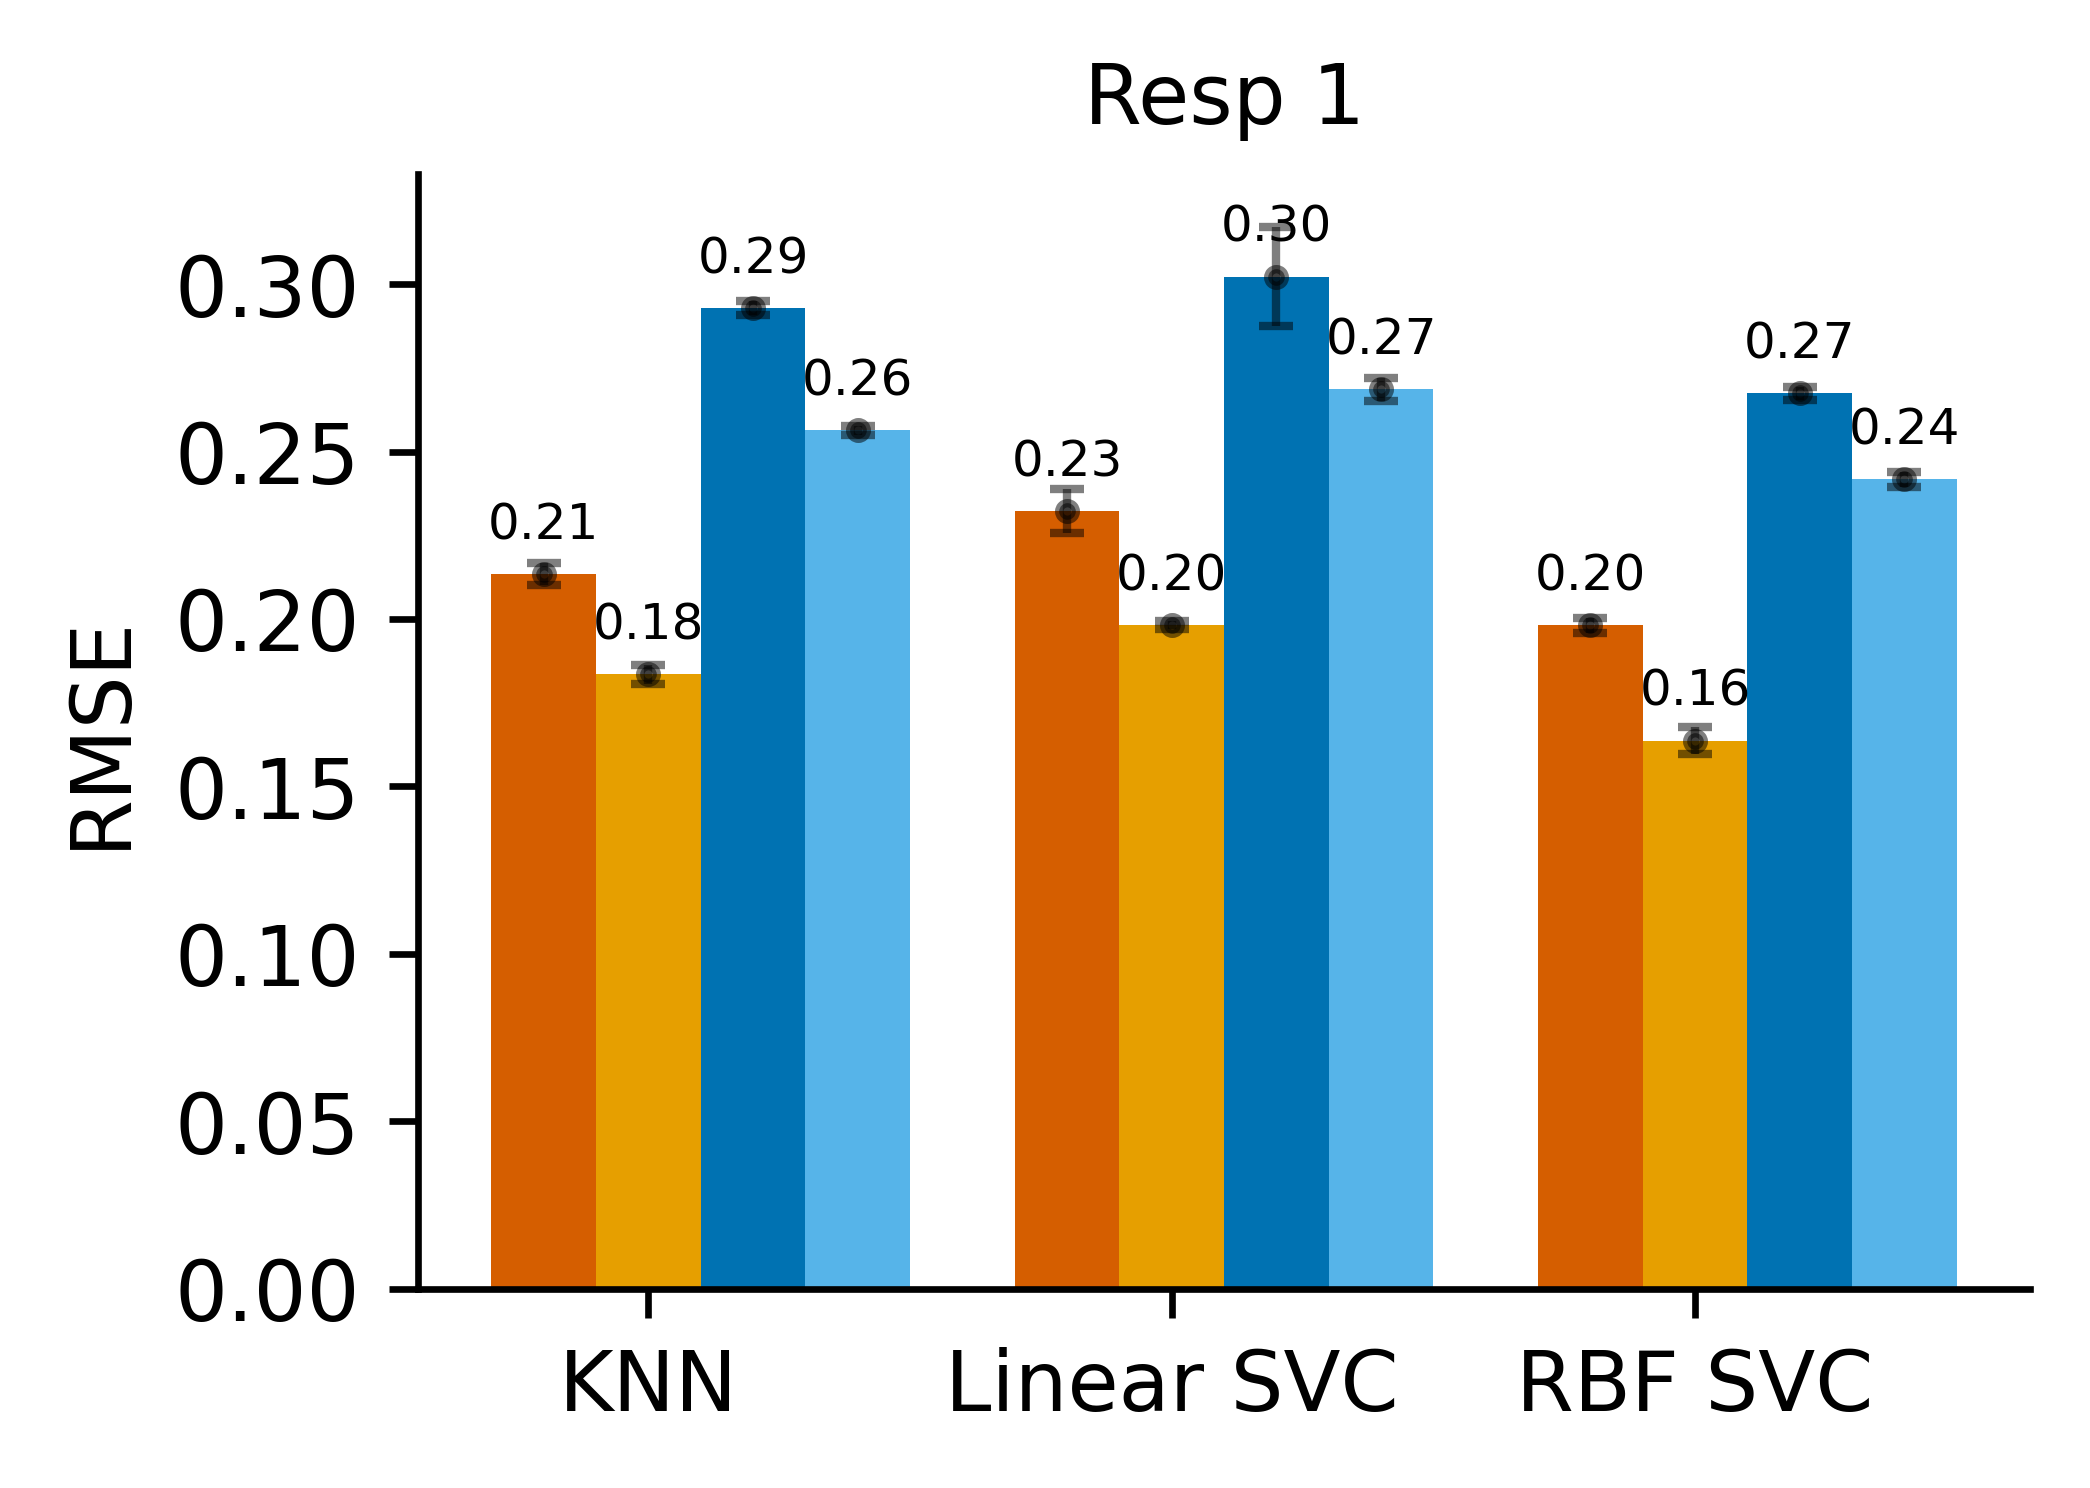

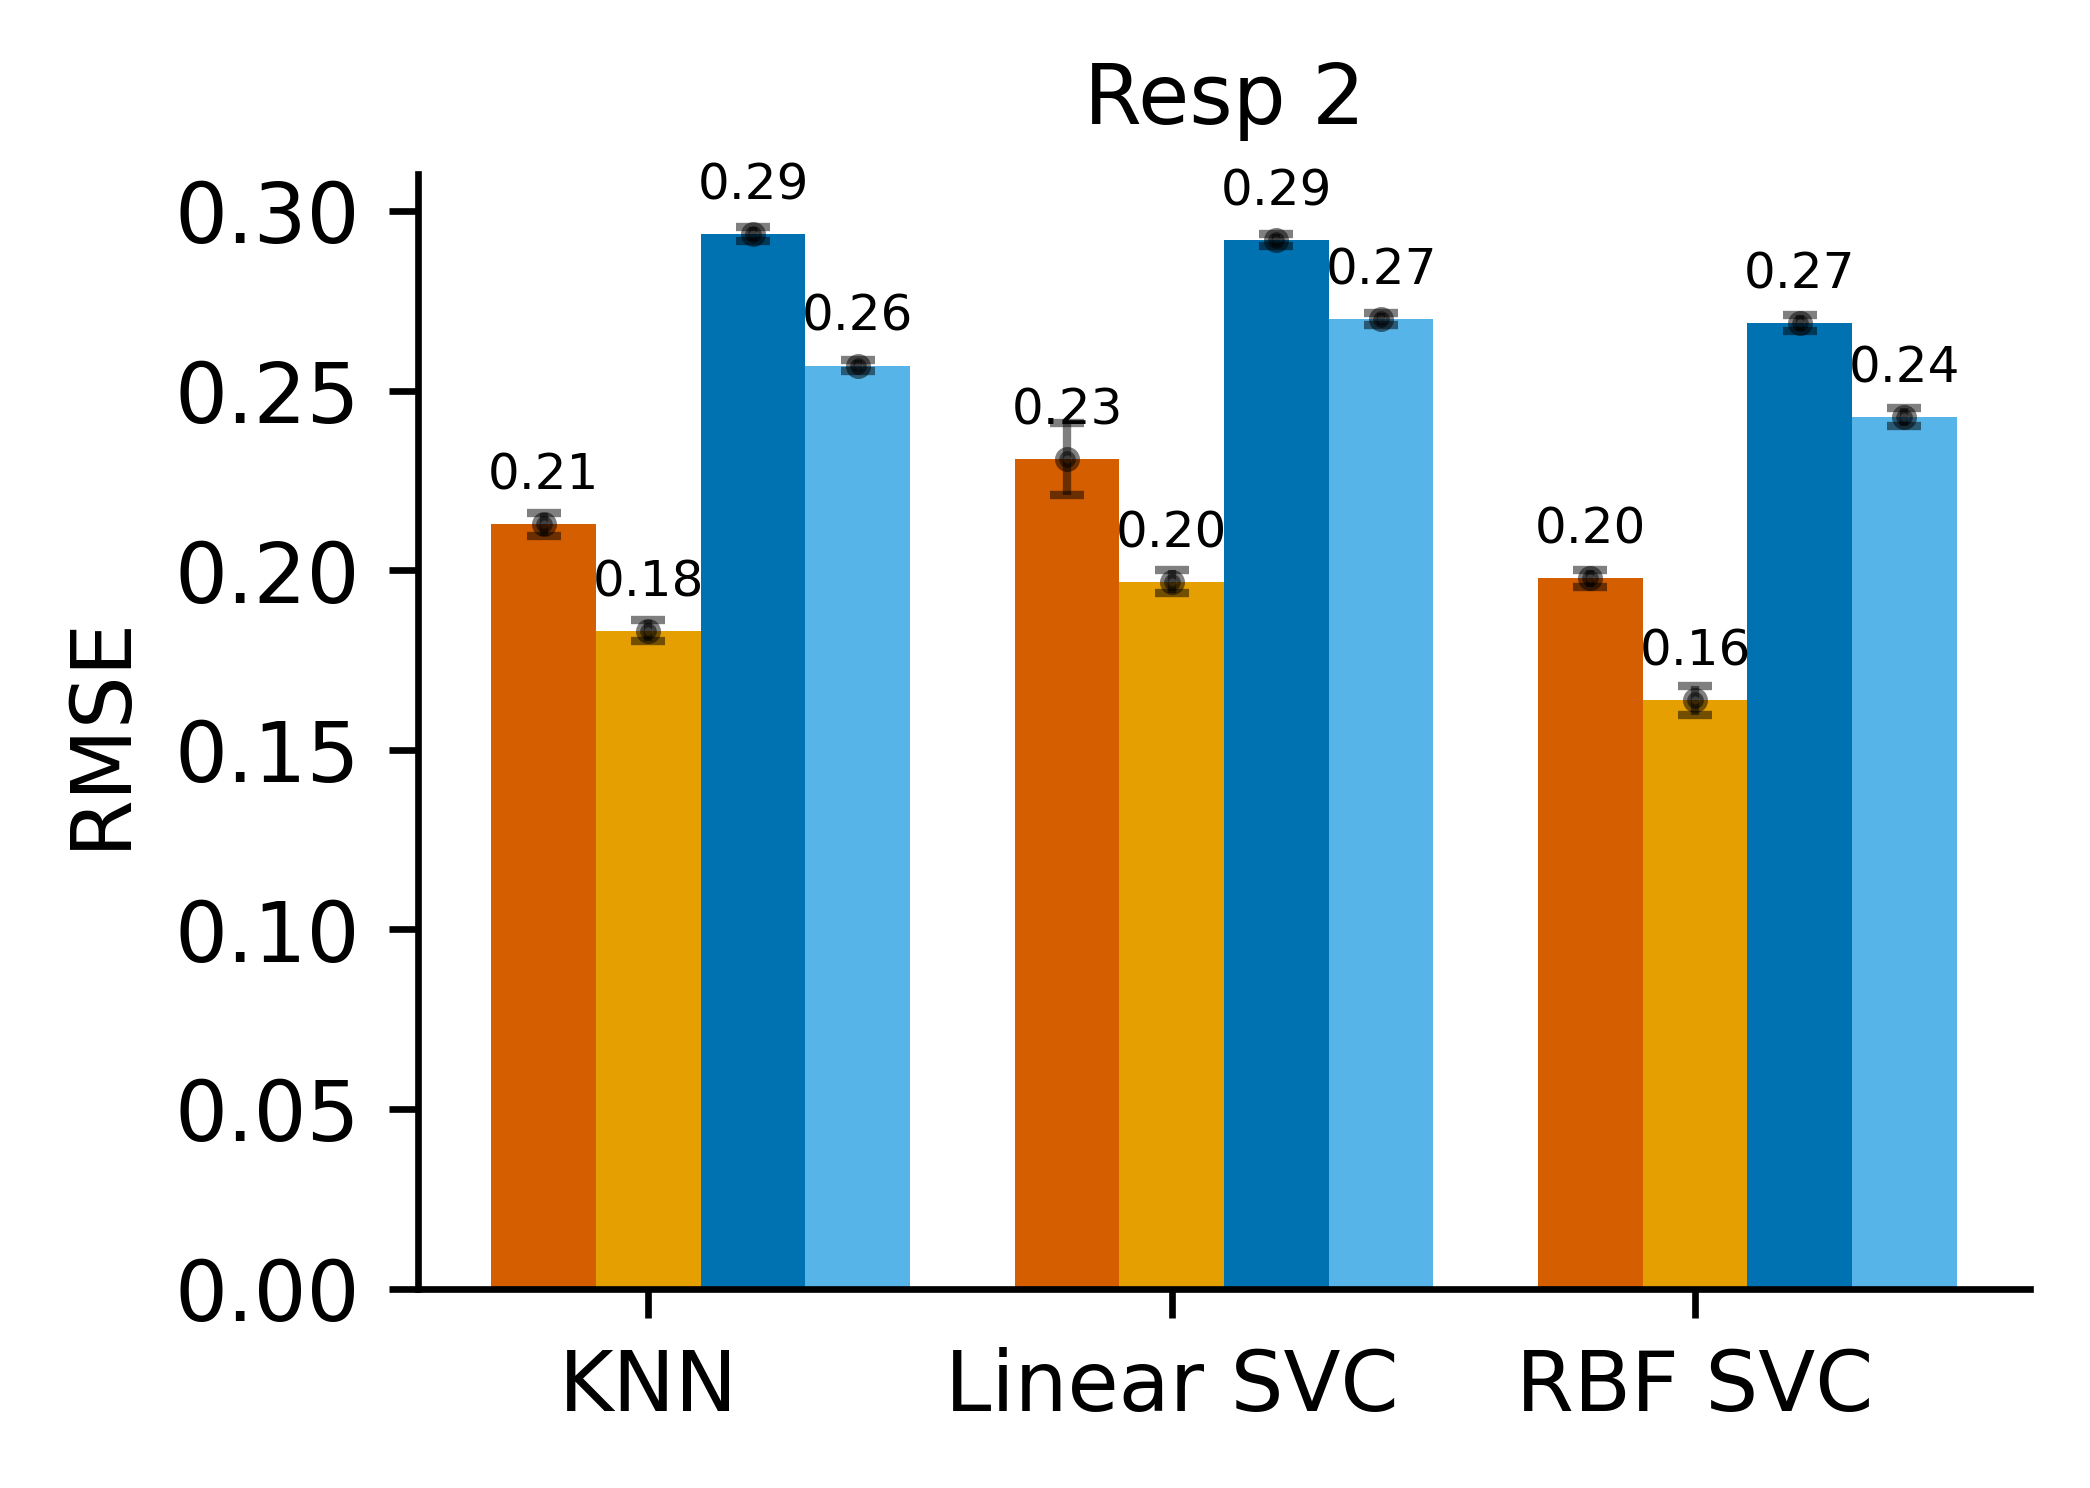

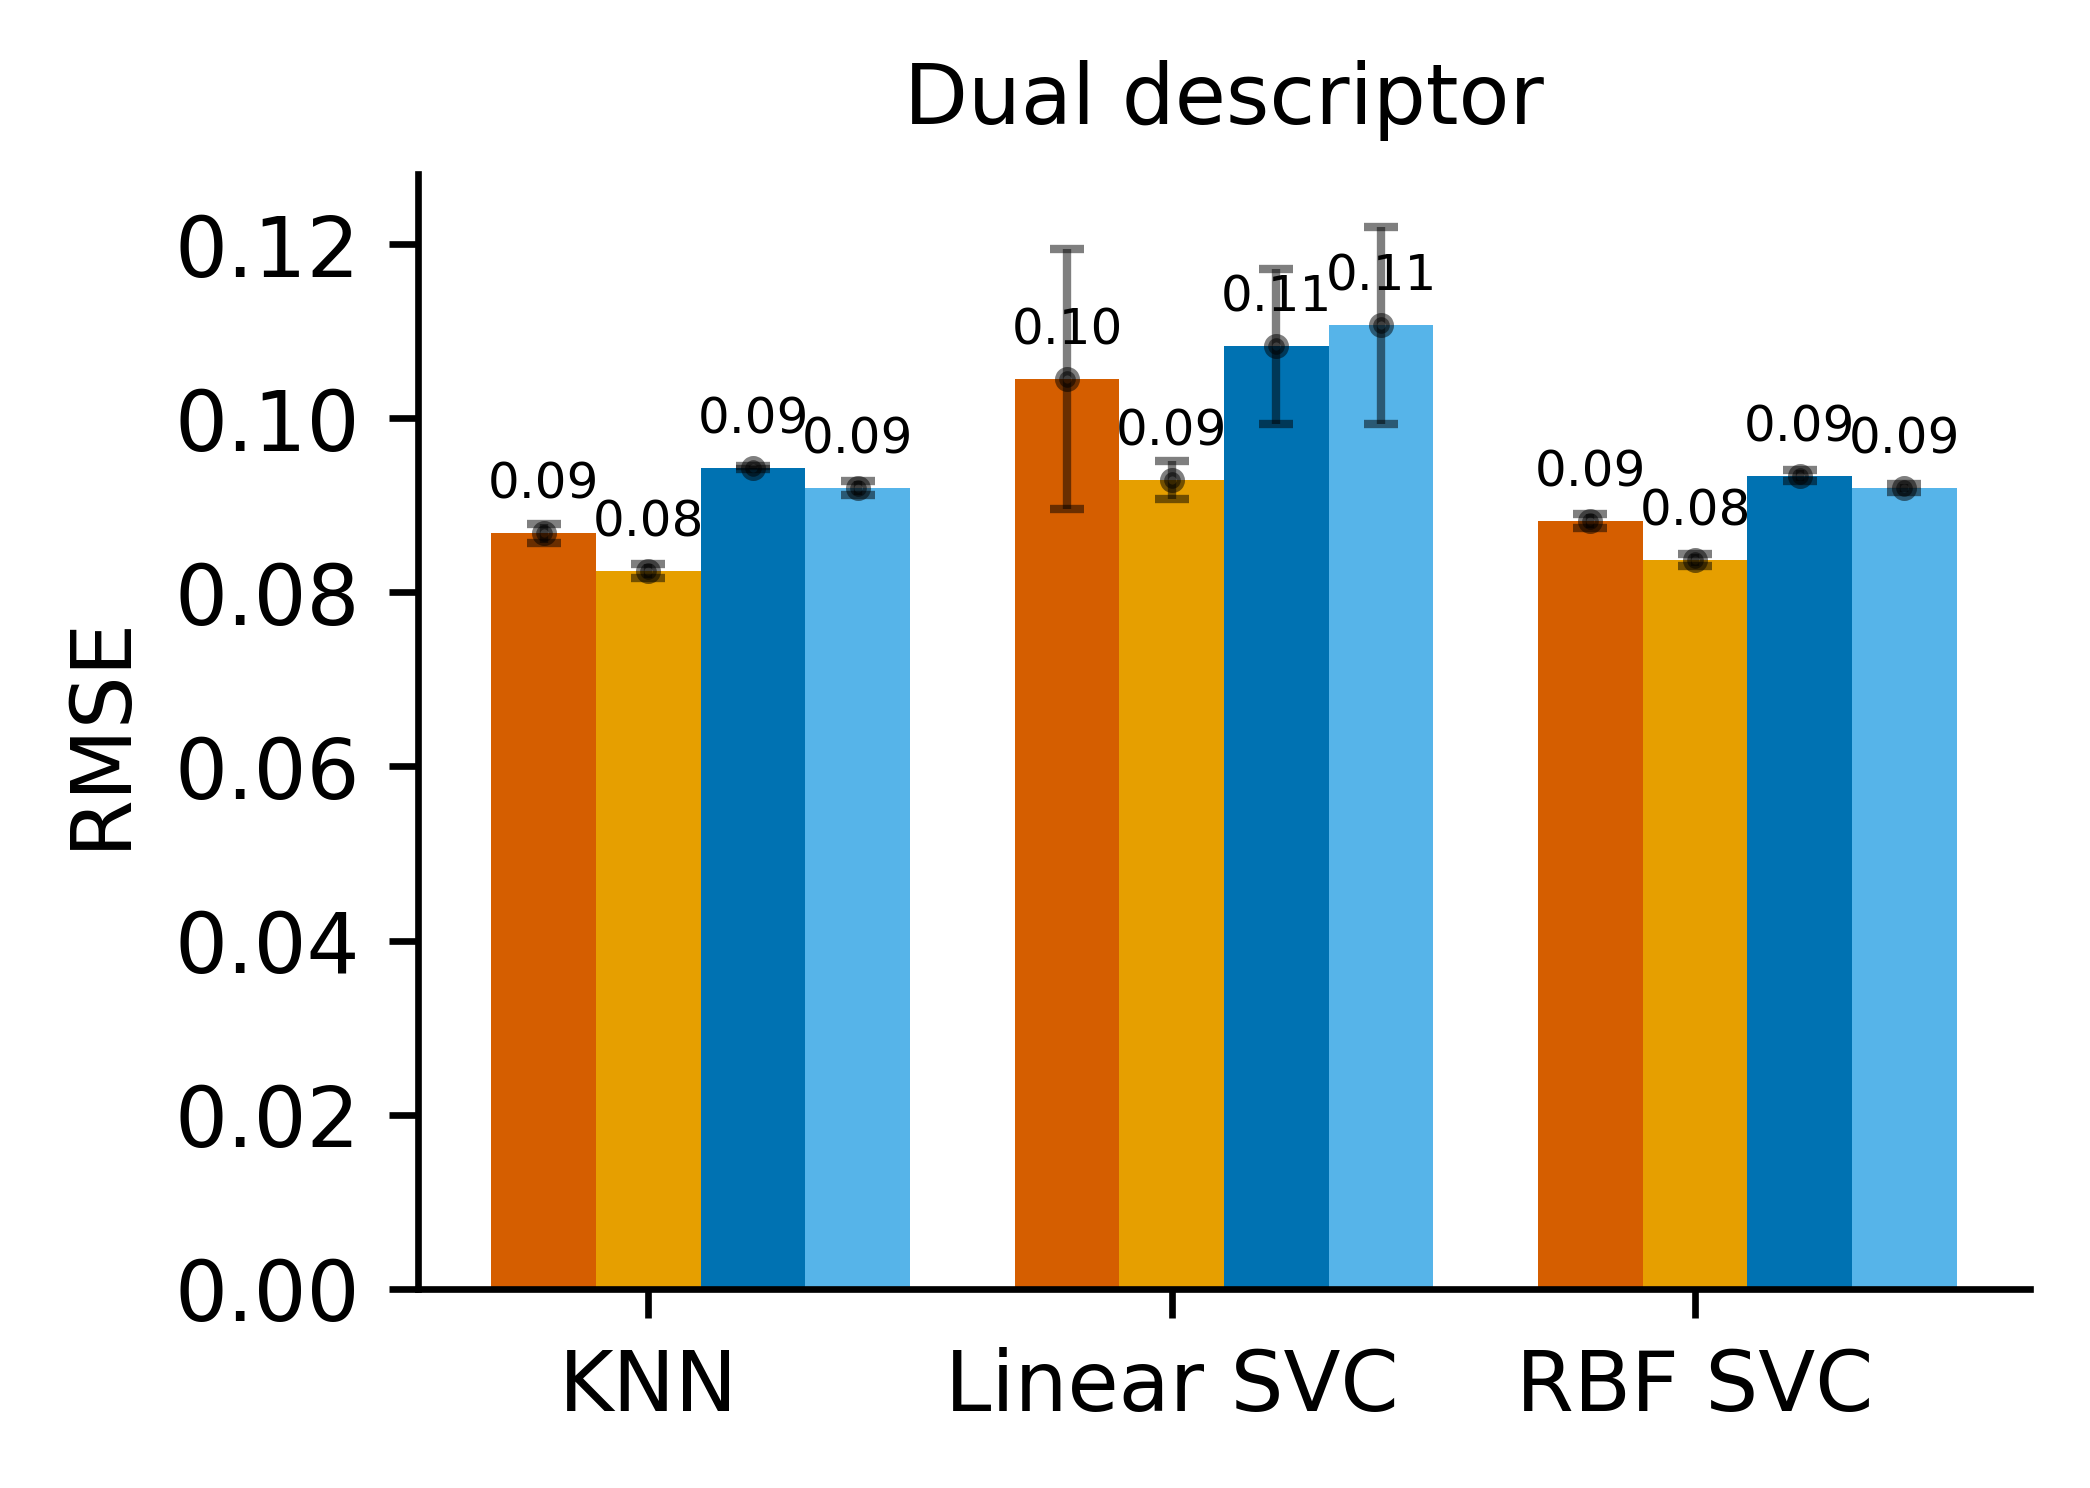

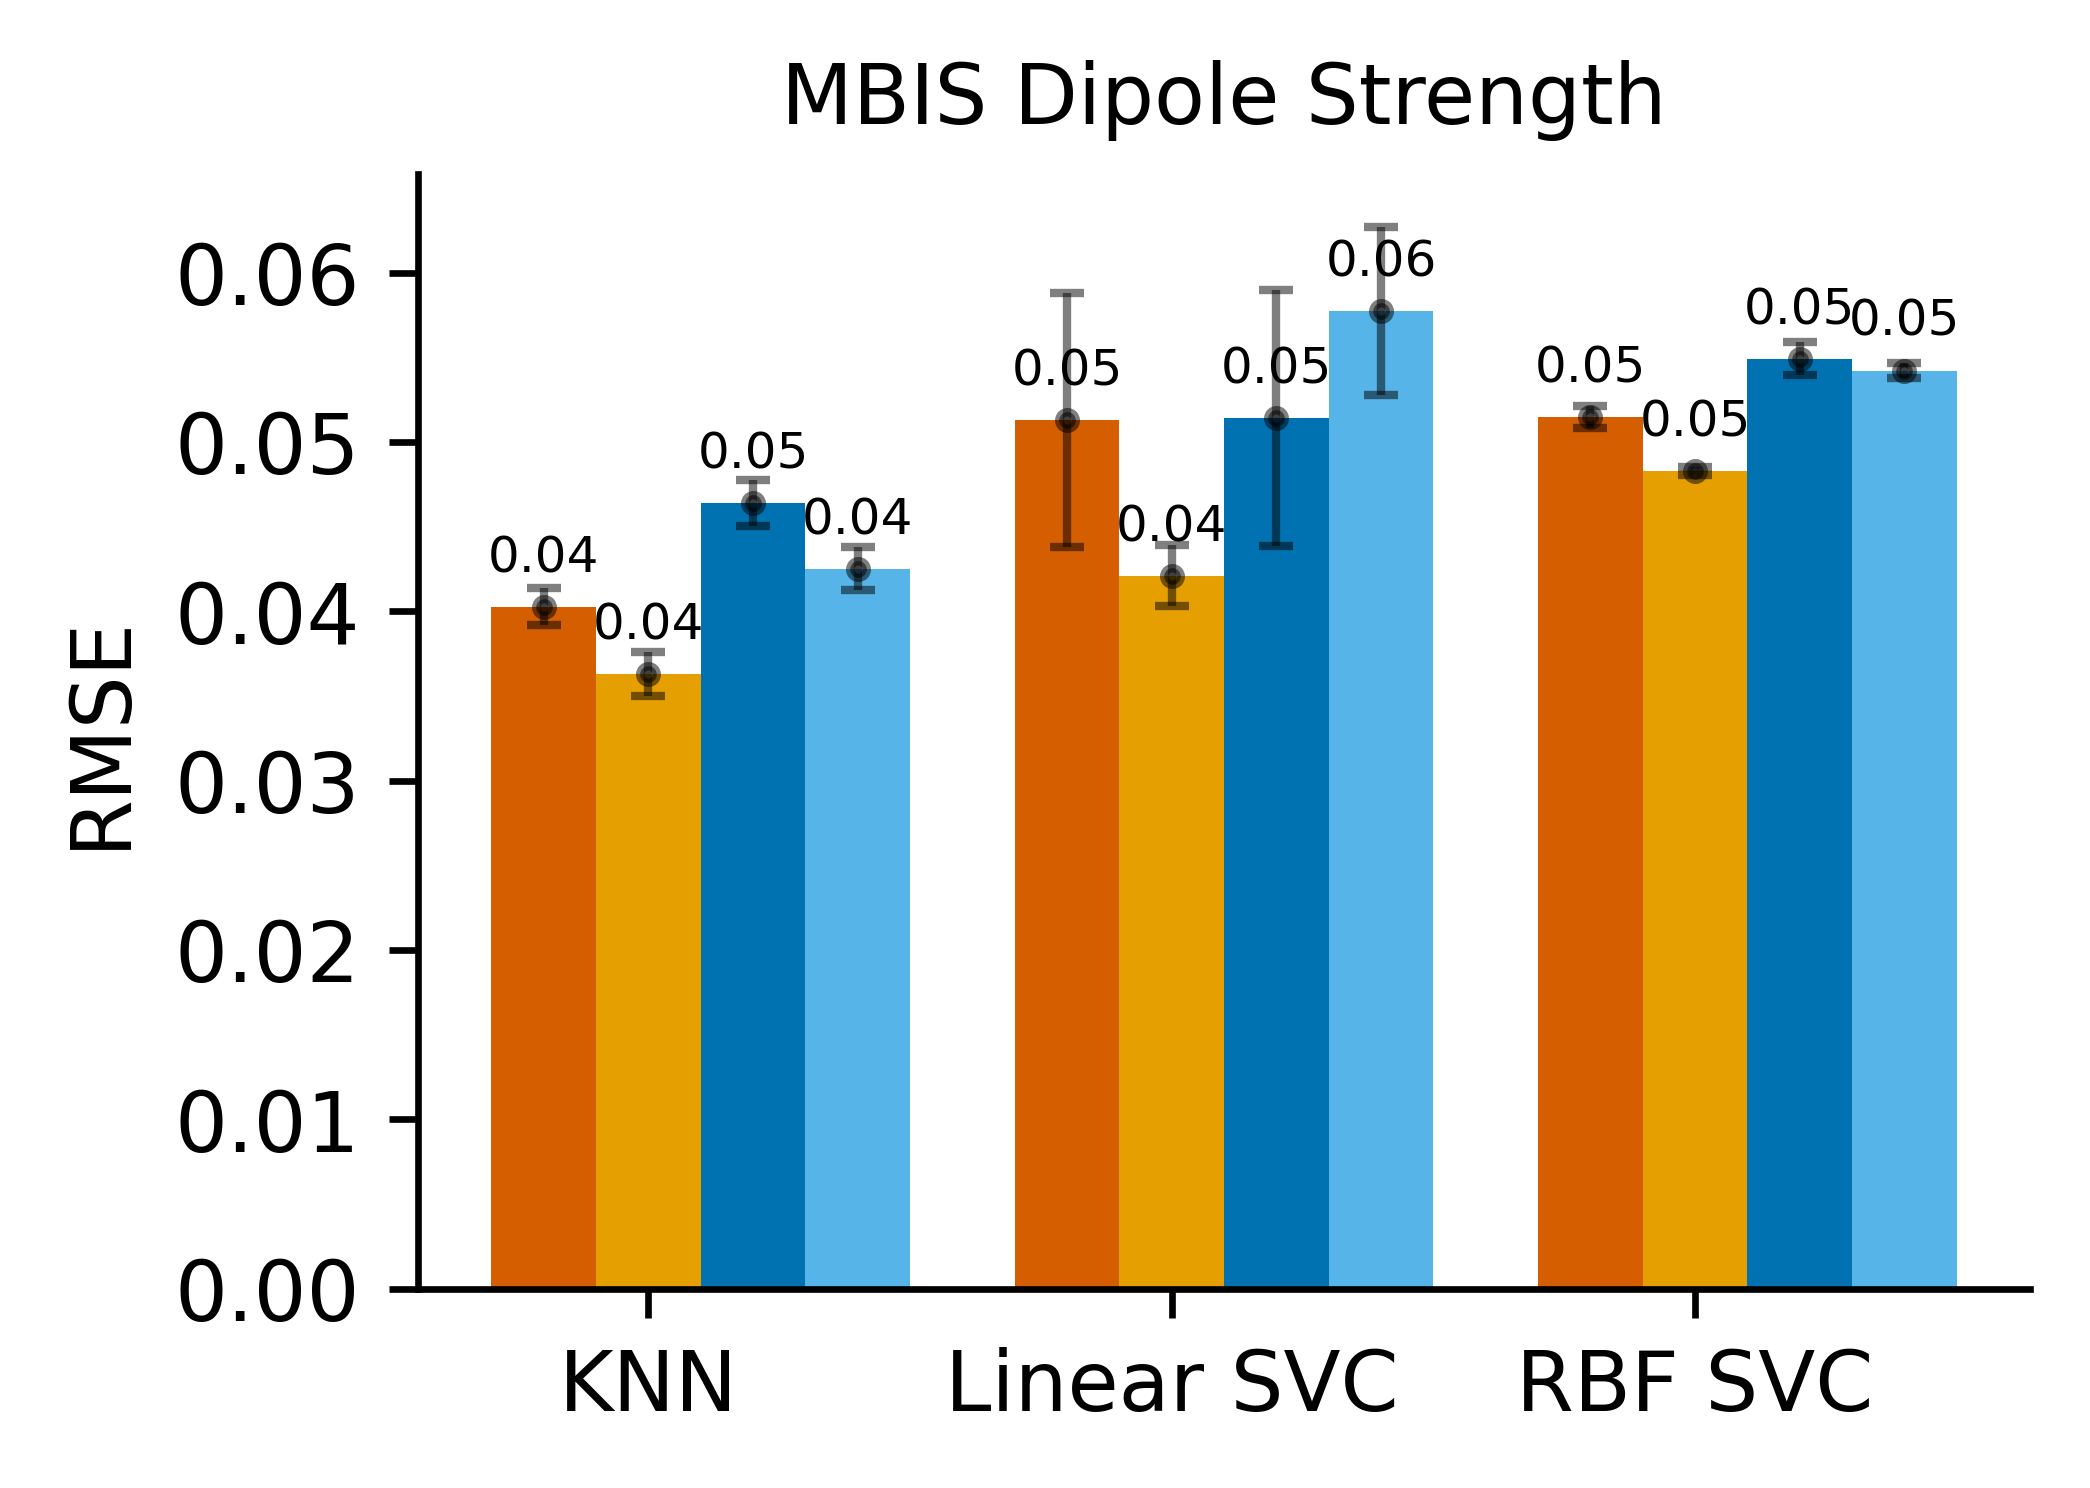

In [5]:
full_pivot = pd.pivot_table(df, values=["best_scores", "std"],index=["encoding","architecture"],columns=["descriptor","estimator"])
nice_rows = ["RoBERTa SELFIES", "RoBERTa SMILES", "BART SELFIES", "BART SMILES"]
classifiers = ['KNN', 'Linear SVC', 'RBF SVC']
data_dict = {}
std_dict = {}

for task in descriptors.keys():
    data_dict[task] = {nice_rows[it]: vals for it, vals in enumerate(full_pivot["best_scores"][task].sort_values(by=["architecture",'encoding'], ascending=[False,True]).values)}
    std_dict[task] = {nice_rows[it]: vals for it, vals in enumerate(full_pivot["std"][task].sort_values(by=["architecture",'encoding'], ascending=[False,True]).values)}
x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars

for it, task in enumerate(descriptors.keys()):
    plt.rcParams['font.size'] = 10
    cm = 1/2.54  # centimeters in inches
    fig, axs = plt.subplots(ncols=1, figsize=(17.1*cm/2, 6*cm), dpi=600, layout='constrained')
    ax = plt.gca()
    plt.rcParams['font.size'] = 6
    data = data_dict[task]
    std = std_dict[task]
    multiplier = 0
    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.errorbar(x + offset, measurement, std[attribute], fmt='.', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=0.5, ms=4, capsize = 2)
        ax.bar_label(rects, padding=3, fmt='%.2f')
        multiplier += 1
    ax.set_ylabel('RMSE')
    ax.spines[['right', 'top',]].set_visible(False)
    ax.set_title(descriptors[task], fontsize=10)
    ax.set_xticks(x + width, classifiers)     
    #handles, labels = plt.gca().get_legend_handles_labels()
    #by_label = dict(zip(labels, handles))
    #fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4, fontsize=10)
    plt.savefig(PLOT_PATH/f'weak_classifiers_{task}.pdf', bbox_inches='tight',dpi=600, transparent=True)
    plt.savefig(PLOT_PATH/f'weak_classifiers_{task}.png', bbox_inches='tight',dpi=600, transparent=True)
    plt.show()